In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csv_in = r'T:\@Mattij\WaterstandenRotte.csv'

### Read csv

In [21]:
df = pd.read_csv(csv_in)
df = df.drop(index=0)
df.set_index('Unnamed: 0', inplace=True)
df.index = pd.to_datetime(df.index)
df.index.name = 'datetime'

c:\python35\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (1,3,5,7,9,11,13,15,17,19,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Select columns and parse as float, replace -999 values

In [22]:
df = df[['MPN-416', 'MPN-435','MPN-439','MPN-507','MPN-519','MPN-532','MPN-533','PLS-614','PLS-68','PLS-70']]
df = df.astype(float)
df.replace(-999,np.nan, inplace=True)

# if necessary, resample to other timestep
df = df.resample('10Min').mean()

In [23]:
df.head()

,MPN-416,MPN-435,MPN-439,MPN-507,MPN-519,MPN-532,MPN-533,PLS-614,PLS-68,PLS-70
datetime,,,,,,,,,,
2015-01-01 00:00:00,-1.0595,NaN,-1.054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:10:00,-1.0630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:20:00,-1.0635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:30:00,-1.0645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01 00:40:00,-1.0705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Create dataframe of existing and not existing values using 0 and 1

In [24]:
newdf = df.notnull().astype('int')
newdf.replace(0,np.nan, inplace=True)

### Iterate over columns and increase line value

In [25]:
for idx, col in enumerate(newdf.columns):
    print(idx, col)
    newdf[col] = newdf[col] + idx

0 MPN-416
1 MPN-435
2 MPN-439
3 MPN-507
4 MPN-519
5 MPN-532
6 MPN-533
7 PLS-614
8 PLS-68
9 PLS-70


### plot

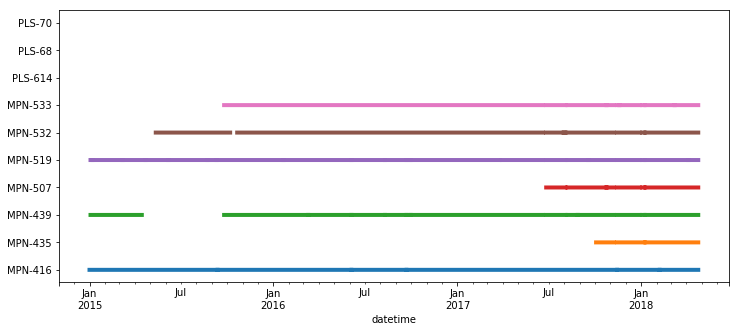

In [27]:
%matplotlib inline
#%matplotlib notebook

ax = newdf.plot(legend=False, figsize=(12,5),lw=4)
#ax = newdf.plot(legend=False, figsize=(12,5),lw=4)
ax.set_yticks(range(1,len(df.columns)+1))
ax.set_yticklabels(list(df.columns))
plt.show()